<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/CodeChallenge_Manipulate_regression_slopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraies
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

display.set_matplotlib_formats('svg')

In [31]:
def build_n_train(x, y, numepochs=500, learningRate=0.05):
  ANNReg = nn.Sequential(
      nn.Linear(1, 1),
      nn.ReLU(),
      nn.Linear(1, 1),
  )

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descend to implement)
  optimizer = torch.optim.SGD(ANNReg.parameters(), lr=learningRate)

  losses = torch.zeros(numepochs)
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNReg(x)

    # compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  final_predictions = ANNReg(x)


  
  return final_predictions, losses

In [22]:
def create_data(m, N=50):
  x = torch.randn(N, 1) / 2
  y = m * x + torch.randn(N, 1) / 2

  # # and plot
  # plt.plot(x, y, 's')
  # plt.show()
  return x, y


# Test it once

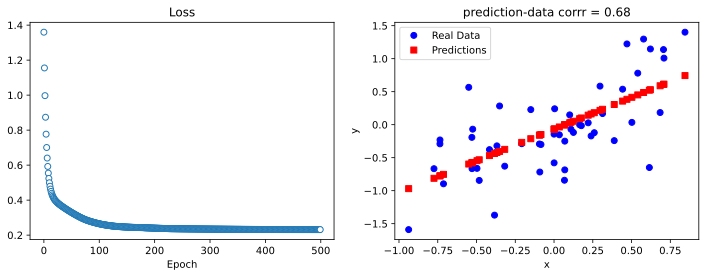

In [36]:
# create a dataset
x, y = create_data(.8)

# run the model
yHat, losses = build_n_train(x, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label='Real Data')
ax[1].plot(x, yHat.detach(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corrr = {np.corrcoef(y.T, yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [27]:
slops = np.linspace(-2, 2, 21)
slops

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
        0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ])

In [38]:
numExps = 50
results = np.zeros((len(slops), numExps, 2))

for i, m in enumerate(slops):
  for N in range(numExps):

    # create a dataset and run the model
    x, y = create_data(m)
    yHat, losses = build_n_train(x, y)

    # store the final loss and performance
    results[i, N, 0] = losses[-1]
    results[i, N, 1] = np.corrcoef(y.T, yHat.detach().T)[0,1]

# correlation can be 0 if the model didn't do well. Set nan's -> 0
results[np.isnan(results)] = 0


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


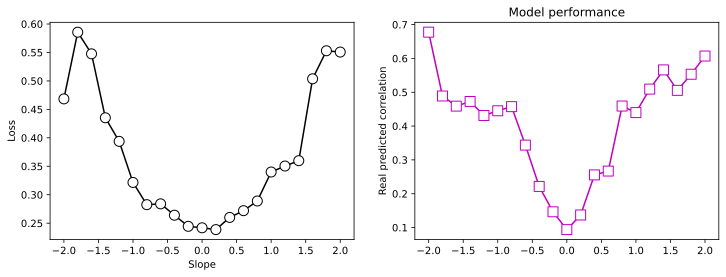

In [39]:
# plot the results!

fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].plot(slops, np.mean(results[:, :, 0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Loss')

ax[1].plot(slops, np.mean(results[:, :, 1], axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_label('Slope')
ax[1].set_ylabel('Real predicted correlation')
ax[1].set_title('Model performance')

plt.show()